In [3]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Xopt class, TNK test function

This is the class method for running Xopt.

TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [4]:
# Import the class
from xopt import Xopt

The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [5]:
import yaml
# Make a proper input file. 
YAML="""
xopt: {output_path: null, verbose: true}

algorithm:
  name: cnsga
  options: {max_generations: 50, population_size: 128, crossover_probability: 0.9, mutation_probability: 1.0,
  selection: auto, verbose: true, population: null}
  
simulation: 
  name: test_TNK
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
  
vocs:
  name: TNK_test
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: {x9: x1}
  constants: {a: dummy_constant}

"""
config = yaml.safe_load(YAML)

In [6]:
# Optional: Connect the function directly
#from xopt.evaluators.test_TNK import evaluate_TNK 
#config['simulation']['evaluate'] = evaluate_TNK 

X = Xopt(config)
X

INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.


{'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}, 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'linked_variables': {'x9': 'x1'}, 'constants': {'a': 'dummy_constant'}}
{'xopt': {'output_path': None, 'logging': 20}, 'algorithm': {'name': 'cnsga', 'options': {'max_generations': 50, 'population_size': 128, 'crossover_probability': 0.9, 'mutation_probability': 1.0, 'selection': 'auto', 'verbose': True, 'population': None}, 'function': 'xopt.cnsga.cnsga', 'max_generations': 50, 'population_size': 128, 'crossover_probability': 0.9, 'mutation_probability': 1.0, 'selection': 'auto', 'verbose': True, 'population': None, 'executor': None, 'vocs': None, 'toolbox': None, 'seed': None, 'evaluate_f': None, 'output_path': None}, 'simulation': {'name': 'test_TNK', 'function': 'xopt.tests.evaluators.TNK.evaluate_TNK', 'evaluate': 'xopt.tests.evaluators.TNK.evaluate_TNK', 'options': {'extra_option': 'abc'}}, 'vocs': {'vari


            Xopt 
________________________________           
Version: 0.4.3+168.g7d48d79.dirty
Configured: True
Config as YAML:
xopt: {output_path: null, logging: 20}
algorithm:
  name: cnsga
  options: {max_generations: 50, population_size: 128, crossover_probability: 0.9,
    mutation_probability: 1.0, selection: auto, verbose: true, population: null}
  function: xopt.cnsga.cnsga
  max_generations: 50
  population_size: 128
  crossover_probability: 0.9
  mutation_probability: 1.0
  selection: auto
  verbose: true
  population: null
  executor: null
  vocs: null
  toolbox: null
  seed: null
  evaluate_f: null
  output_path: null
simulation:
  name: test_TNK
  function: xopt.tests.evaluators.TNK.evaluate_TNK
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
  options: {extra_option: abc}
vocs:
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: {x9: x1}

In [7]:
# Note that the repr string contains all of the config information
X.random_evaluate()

{'y1': 2.5139289509160285,
 'y2': 2.755698767586621,
 'c1': 12.839435135715947,
 'c2': 9.144086749429537,
 'some_array': array([1, 2, 3])}

# Run CNSGA

CNSGA is designed to run in parallel with an asynchronous executor as defined in PEP 3148

In [8]:
# Pick one of these
#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [9]:
# Change max generations
X.algorithm['options']['max_generations'] = 10
X.run(executor=executor)

INFO:xopt.xopt:Starting at time 2021-09-24T11:28:11-05:00



    Continuous Non-dominated Sorting Genetic Algorithm
    Version {__version__}
    
Creating toolbox from vocs.
Created toolbox with 2 variables, 2 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'a': 'dummy_constant'},
 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]},
 'linked_variables': {'x9': 'x1'},
 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'},
 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}}
Initializing with a new population, size 128
Maximum generations: 10
____________________________________________________
128 fitness calculations for initial generation
................................................................................................................................done.
Submitting first batch of children
.................................................................................................................................done.
_______________________________________________

In [10]:
# The last population is saved internally:
list(X.results)

['variables', 'generation', 'vocs', 'error', 'inputs', 'outputs']

In [11]:
X.results['outputs'][0:5]

[{'y1': 0.745179502341021,
  'y2': 0.7593820348328354,
  'c1': 0.033091900733734095,
  'c2': 0.12739202836221297,
  'some_array': array([1, 2, 3])},
 {'y1': 0.745179502341021,
  'y2': 0.7593820348328354,
  'c1': 0.033091900733734095,
  'c2': 0.12739202836221297,
  'some_array': array([1, 2, 3])},
 {'y1': 0.4906935049533761,
  'y2': 0.8660498339746554,
  'c1': 0.029197133293459077,
  'c2': 0.13407909180292563,
  'some_array': array([1, 2, 3])},
 {'y1': 0.4286101145275175,
  'y2': 0.9612005895063502,
  'c1': 0.016633039663562596,
  'c2': 0.21780249950877914,
  'some_array': array([1, 2, 3])},
 {'y1': 0.09138956032733514,
  'y2': 1.0694083449096219,
  'c1': 0.13145516046370617,
  'c2': 0.4911883546622034,
  'some_array': array([1, 2, 3])}]

In [12]:
# Increase the max_generations, and it will continue where it left off
X.algorithm['options']['max_generations'] = 20
X.run(executor=executor)

INFO:xopt.xopt:Starting at time 2021-09-24T11:28:14-05:00



    Continuous Non-dominated Sorting Genetic Algorithm
    Version {__version__}
    
Creating toolbox from vocs.


INFO:xopt.tools:Loading config from dict.


Warning in cnsga_toolbox: Redefining creator.Individual
Created toolbox with 2 variables, 2 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'a': 'dummy_constant'},
 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]},
 'linked_variables': {'x9': 'x1'},
 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'},
 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}}
Initializing with existing population, size 128
Maximum generations: 31
____________________________________________________
128 fitness calculations for initial generation
................................................................................................................................done.
Submitting first batch of children
.................................................................................................................................done.
__________________________________________________________
Generation 11 completed in 0.00490 minutes
.

# Plot

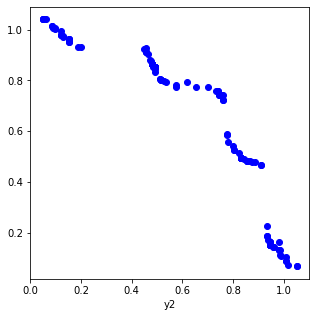

In [13]:
# Extract objectives from output
key1, key2 = list(X.vocs['objectives'])

x = [o[key1] for o in X.results['outputs']]
y = [o[key2] for o in X.results['outputs']]

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(x, y, color='blue')
#ax.set_xlim(X_RANGE)
#ax.set_ylim(Y_RANGE)
ax.set_xlabel(key1)
ax.set_xlabel(key2)
ax.set_aspect('auto')
#ax.set_title(NAME)